In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np


In [157]:

df = pd.read_csv("C:/Project2022/Movie Predication/movie_metadata.csv")


In [158]:
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [159]:
df.shape

(5043, 28)

In [160]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [161]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [162]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [163]:
df.isna().any()

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link              False
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [164]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [165]:
df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country','actor_2_facebook_likes','plot_keywords'],inplace=True)

In [166]:
df.shape

(4737, 28)

In [167]:
df["content_rating"].fillna("R", inplace = True)

In [168]:
df["aspect_ratio"].fillna(df["aspect_ratio"].median(),inplace=True)

In [169]:
df["budget"].fillna(df["budget"].median(),inplace=True)

In [170]:
df['gross'].fillna(df['gross'].median(),inplace=True)

In [171]:
df.isna().sum()

color                        8
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [172]:
df = df.drop(columns=['color', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'aspect_ratio','director_name','movie_title'])

In [173]:
df.drop_duplicates(inplace=True)
df.shape

(4695, 19)

In [174]:
df["language"].value_counts()

English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Portuguese       8
Korean           8
Danish           5
Hebrew           4
Persian          4
Norwegian        4
Swedish          4
Dutch            4
Thai             3
Arabic           3
Dari             2
Aboriginal       2
Indonesian       2
None             2
Zulu             2
Czech            1
Romanian         1
Vietnamese       1
Dzongkha         1
Polish           1
Maya             1
Filipino         1
Icelandic        1
Kazakh           1
Hungarian        1
Bosnian          1
Telugu           1
Aramaic          1
Mongolian        1
Greek            1
Name: language, dtype: int64

C:\Important\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


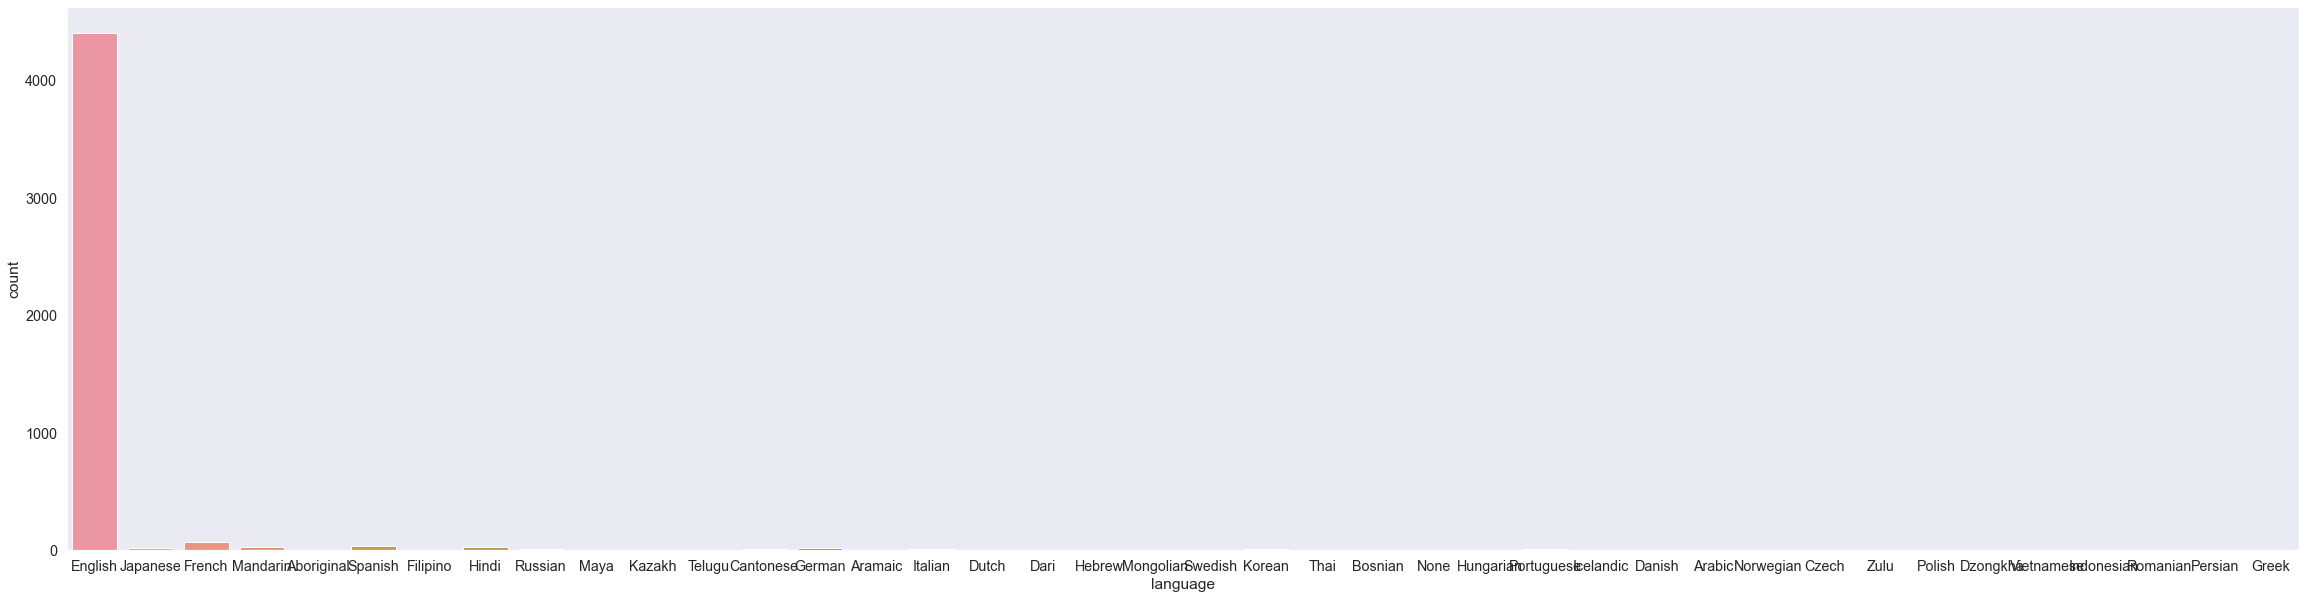

In [175]:
plt.figure(figsize=(40,10))
sns.countplot(df["language"])
plt.show()

In [176]:
df["Profit"]=df['budget'].sub(df['gross'], axis = 0) 

df.head(5)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,-523505847.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,-9404152.0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,44925825.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,-198130642.0
5,462.0,132.0,475.0,530.0,640.0,73058679.0,Action|Adventure|Sci-Fi,212204,1873,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,190641321.0


In [177]:
df['Profit_Percentage']=(df["Profit"]/df["gross"])*100
df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,Profit_Percentage
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,0.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,-523505847.0,-68.836532
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,0.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,-9404152.0,-3.039439
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,1.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,44925825.0,22.454585
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,0.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,-198130642.0,-44.212697
5,462.0,132.0,475.0,530.0,640.0,73058679.0,Action|Adventure|Sci-Fi,212204,1873,1.0,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,190641321.0,260.942743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,35.0,80.0,0.0,0.0,0.0,70071.0,Thriller,589,0,0.0,...,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,74,-63071.0,-90.010133
5035,56.0,81.0,0.0,6.0,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,52055,147,0.0,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,0,-2033920.0,-99.657017
5037,14.0,95.0,0.0,133.0,296.0,4584.0,Comedy|Drama,1338,690,1.0,...,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,413,4416.0,96.335079
5038,1.0,87.0,2.0,318.0,637.0,26005908.0,Comedy|Drama,629,2283,2.0,...,English,Canada,R,20000000.0,2013.0,470.0,7.7,84,-6005908.0,-23.094398


In [178]:
value_counts=df["country"].value_counts()
print(value_counts)

USA               3568
UK                 420
France             149
Canada             107
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Russia              11
Ireland             11
Mexico              11
Denmark             11
South Africa         8
Brazil               8
Norway               7
Sweden               5
Netherlands          5
Thailand             4
Iran                 4
Argentina            4
Israel               3
West Germany         3
Switzerland          3
Belgium              3
Czech Republic       3
Romania              2
Taiwan               2
Poland               2
Iceland              2
Hungary              2
Greece               2
Official site        1
Cambodia             1
Afghanistan          1
Indonesia            1
Kyrgyzstan           1
Colombia             1
New Line   

In [179]:
vals = value_counts[:2].index
print (vals)
df['country'] = df.country.where(df.country.isin(vals), 'other')

Index(['USA', 'UK'], dtype='object')


In [180]:
df["country"].value_counts()

USA      3568
other     707
UK        420
Name: country, dtype: int64

In [181]:
df.head(10)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Profit,Profit_Percentage
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,4834,0.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,-523505847.0,-68.836532
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,Action|Adventure|Fantasy,471220,48350,0.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,-9404152.0,-3.039439
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,Action|Adventure|Thriller,275868,11700,1.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,44925825.0,22.454585
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,Action|Thriller,1144337,106759,0.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,-198130642.0,-44.212697
5,462.0,132.0,475.0,530.0,640.0,73058679.0,Action|Adventure|Sci-Fi,212204,1873,1.0,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,190641321.0,260.942743
6,392.0,156.0,0.0,4000.0,24000.0,336530303.0,Action|Adventure|Romance,383056,46055,0.0,...,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,0,-78530303.0,-23.335284
7,324.0,100.0,15.0,284.0,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,294810,2036,1.0,...,English,USA,PG,260000000.0,2010.0,553.0,7.8,29000,59192738.0,29.477389
8,635.0,141.0,0.0,19000.0,26000.0,458991599.0,Action|Adventure|Sci-Fi,462669,92000,4.0,...,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,118000,-208991599.0,-45.532772
9,375.0,153.0,282.0,10000.0,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,321795,58753,3.0,...,English,UK,PG,250000000.0,2009.0,11000.0,7.5,10000,-51956980.0,-17.206749
10,673.0,183.0,0.0,2000.0,15000.0,330249062.0,Action|Adventure|Sci-Fi,371639,24450,0.0,...,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,197000,-80249062.0,-24.299558


In [182]:
df['genres'].value_counts()

Drama                                                           209
Comedy                                                          186
Comedy|Drama|Romance                                            182
Comedy|Drama                                                    180
Comedy|Romance                                                  149
                                                               ... 
Adventure|Comedy|Family|Sci-Fi                                    1
Action|Adventure|Crime|Drama|Family|Fantasy|Romance|Thriller      1
Adventure|Comedy|History|Romance                                  1
Adventure|Family|Fantasy|Sci-Fi                                   1
Comedy|Crime|Horror                                               1
Name: genres, Length: 875, dtype: int64

In [183]:
df.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
gross                        float64
genres                        object
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
Profit                       float64
Profit_Percentage            float64
dtype: object

In [184]:
cat_attributes= ['genres','language','country']
for att in cat_attributes:
    print(f'{att}:\n--------')
    res = df[att].value_counts()
    print(res)
    print('***********************************')

genres:
--------
Drama                                                           209
Comedy                                                          186
Comedy|Drama|Romance                                            182
Comedy|Drama                                                    180
Comedy|Romance                                                  149
                                                               ... 
Adventure|Comedy|Family|Sci-Fi                                    1
Action|Adventure|Crime|Drama|Family|Fantasy|Romance|Thriller      1
Adventure|Comedy|History|Romance                                  1
Adventure|Family|Fantasy|Sci-Fi                                   1
Comedy|Crime|Horror                                               1
Name: genres, Length: 875, dtype: int64
***********************************
language:
--------
English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian

Text(0.5, 1.0, 'country')

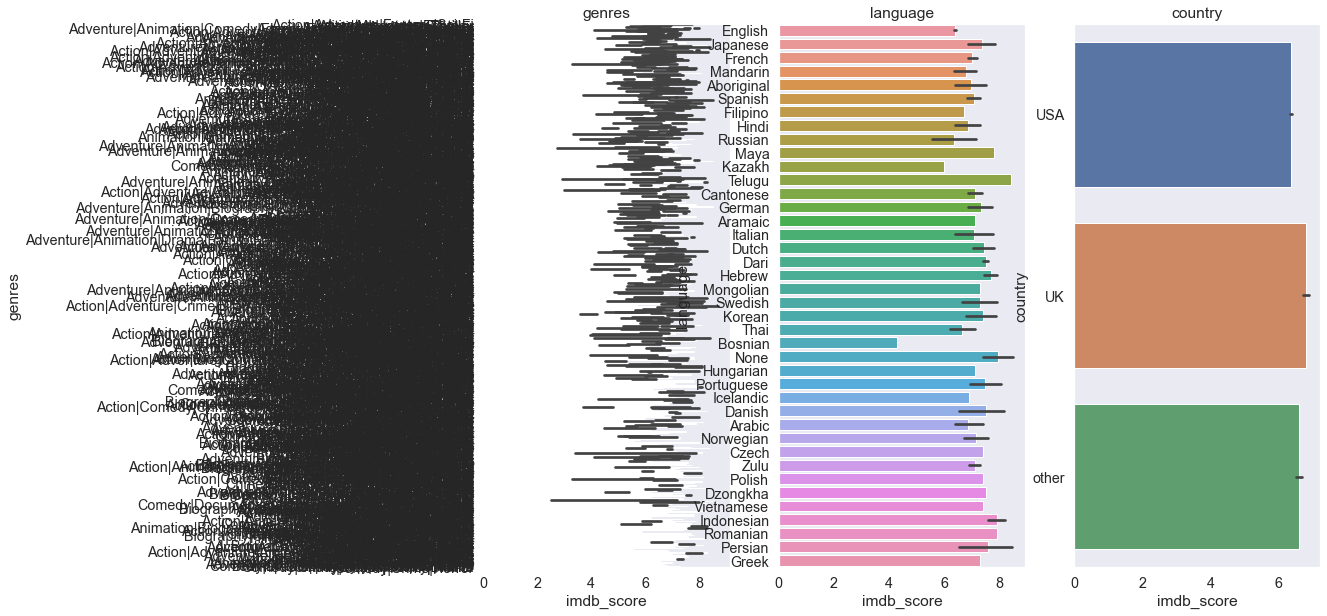

In [185]:
sns.set(rc={'figure.figsize': [15, 10]}, font_scale=1.3, style='dark')

plt.subplot(1,3,1)
#sns.barplot(x=df['color'].value_counts())
sns.barplot(data=df, y='genres', x='imdb_score')
plt.title('genres')
 

plt.subplot(1,3,2)
sns.barplot(data=df, y='language', x='imdb_score')
plt.title('language')

plt.subplot(1,3,3)
sns.barplot(data=df, y='country', x='imdb_score')
plt.title('country')

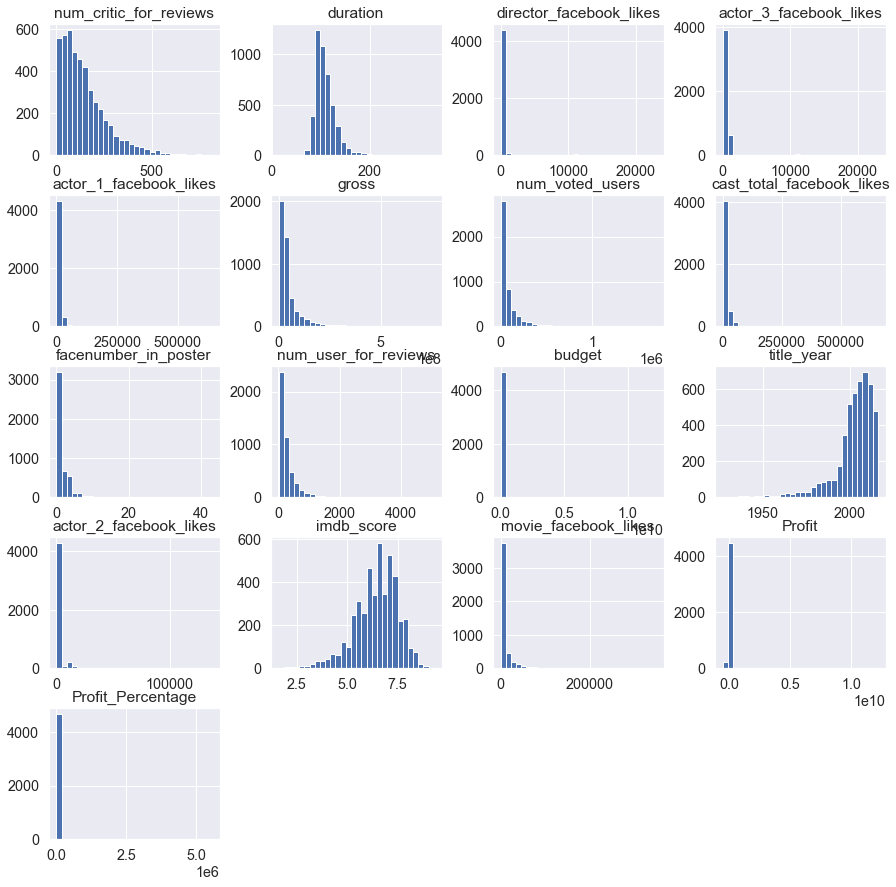

In [186]:
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3, style='dark')
df.hist(bins=30)
plt.show()

C:\Important\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Important\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Important\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

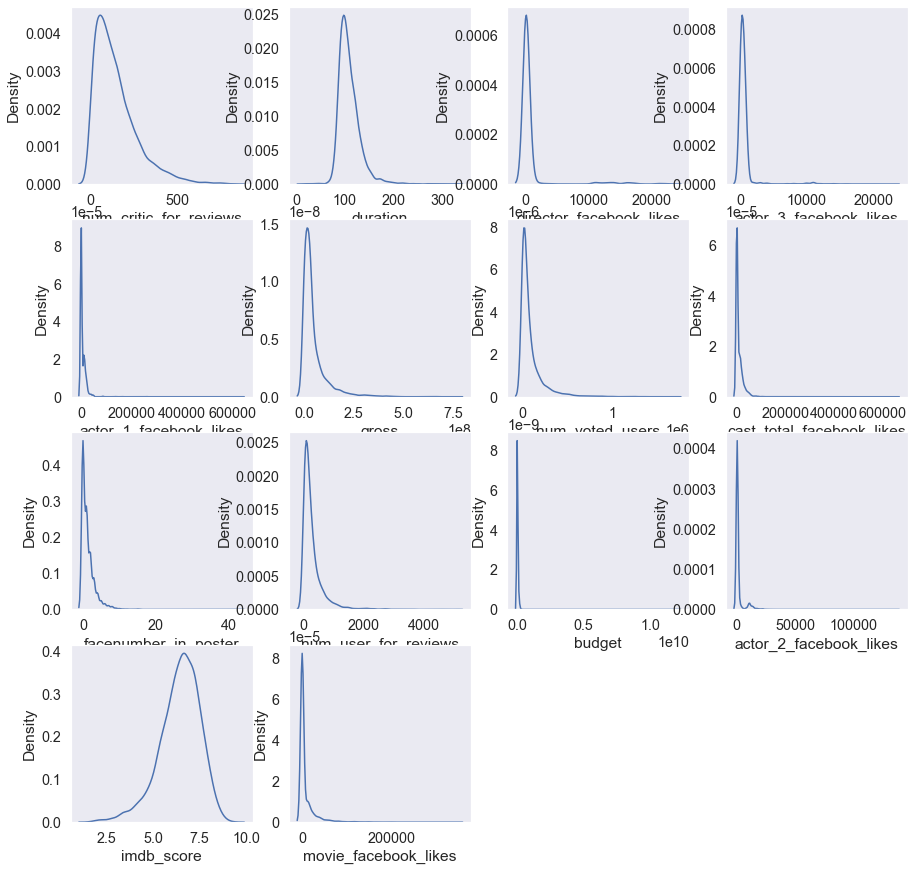

In [187]:
sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.3, style='dark')
num_attr= ['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes','imdb_score','movie_facebook_likes']
for i, att in zip(range(1,30),num_attr):
    plt.subplot(4,4,i)   
    sns.distplot(df[att],hist=False)

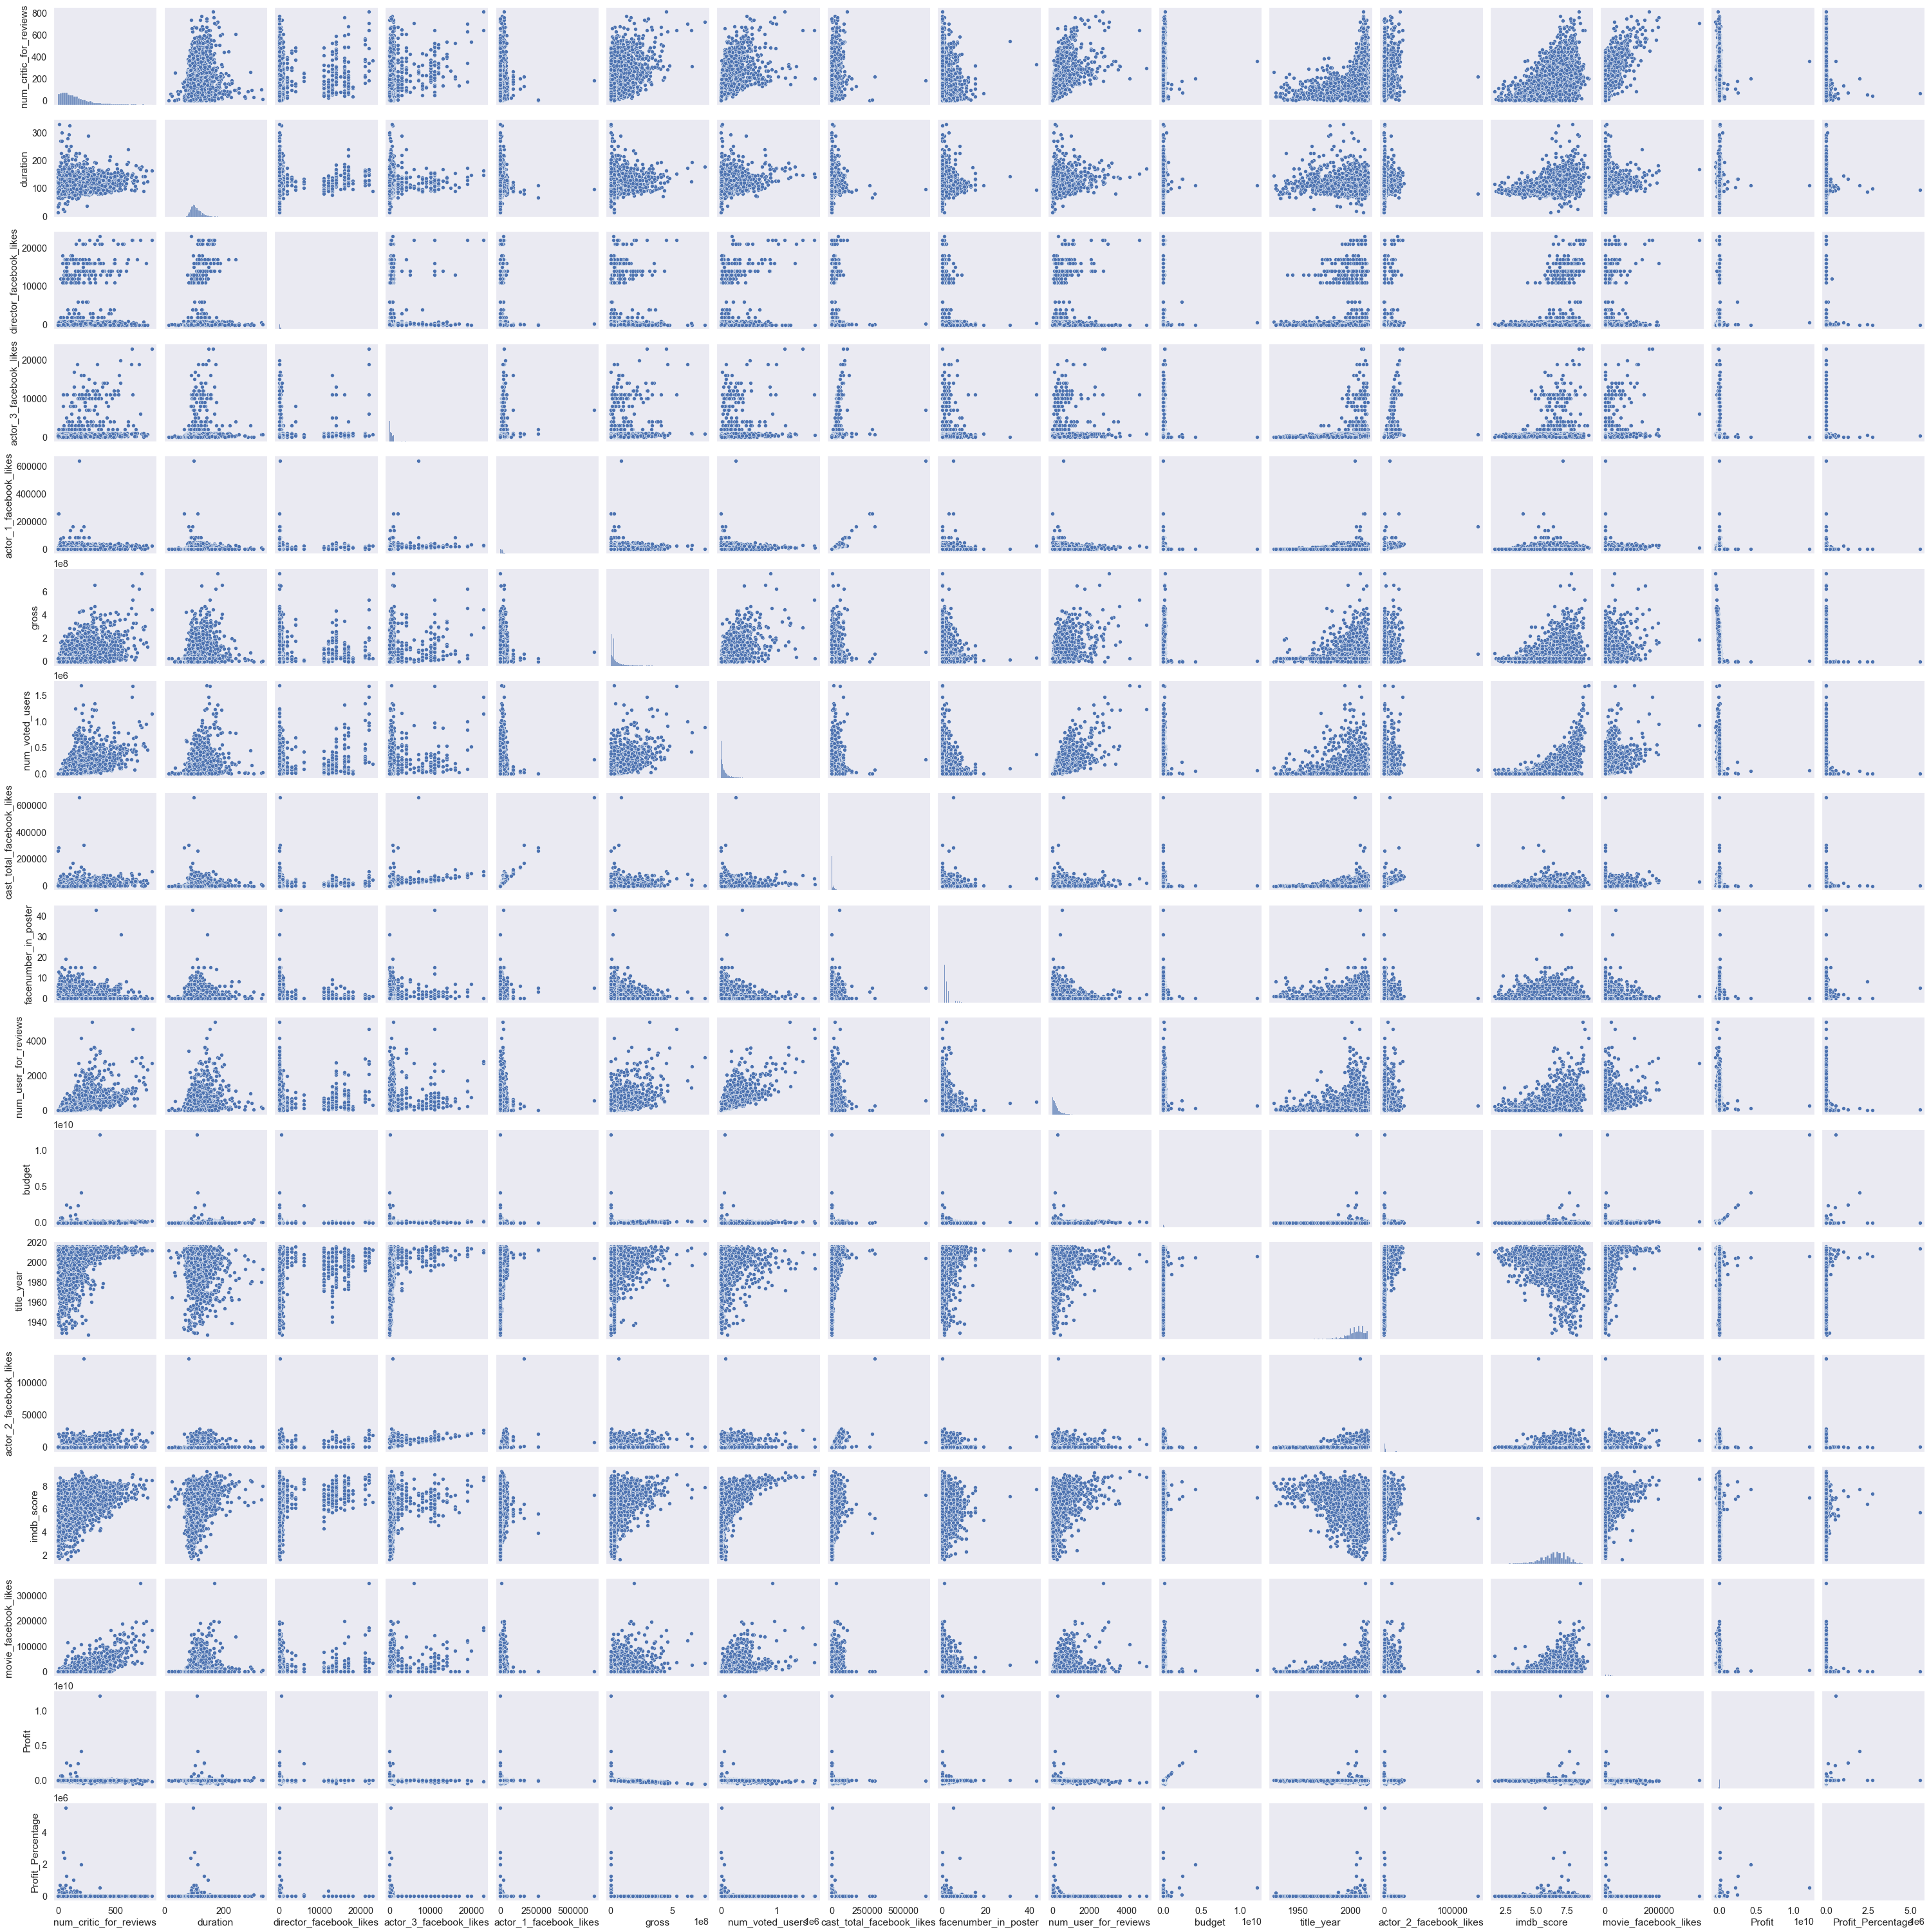

In [188]:
sns.color_palette("flare", as_cmap=True)
sns.pairplot(df)

<AxesSubplot:>

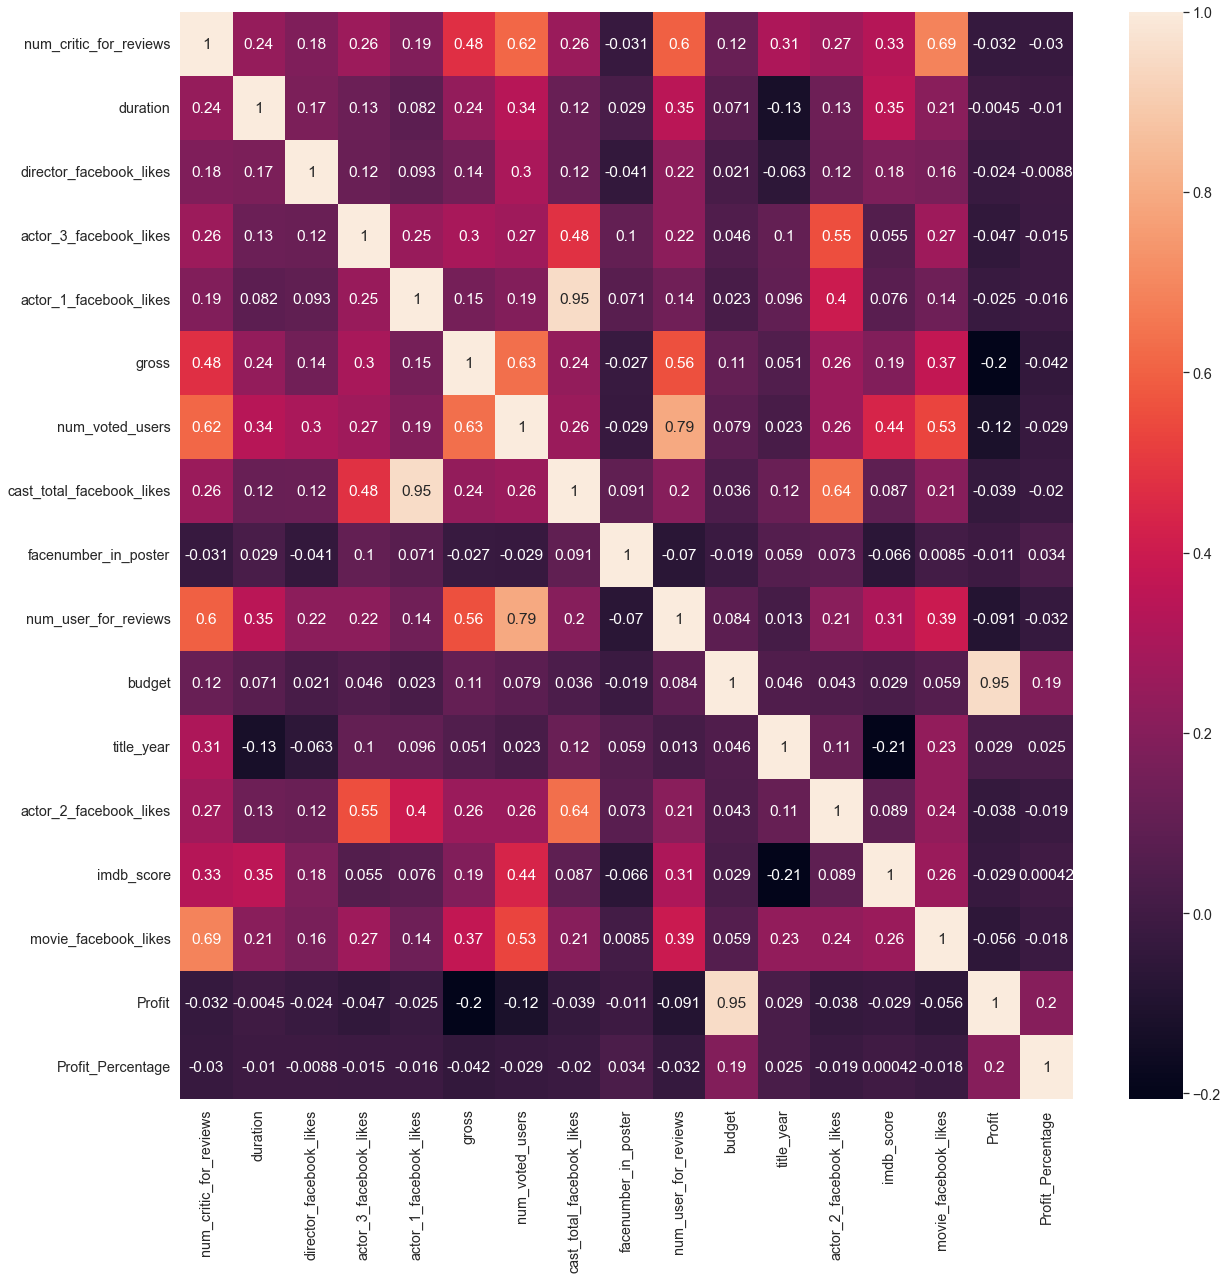

In [189]:
sns.set(rc={'figure.figsize': [20, 20]}, font_scale=1.3, style='dark')
sns.heatmap(data=df.corr(), cmap='rocket', annot=True)

In [190]:
#Test module

In [191]:
df = pd.get_dummies(df, columns=['genres', 'country', 'language','content_rating'])

In [192]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=0)
train_set_y = train_set["imdb_score"]
train_set_X = train_set.drop(['imdb_score'],axis=1)
test_set_y = test_set["imdb_score"]
test_set_X = test_set.drop(['imdb_score'],axis=1)

In [193]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_set_X, train_set_y)

DecisionTreeRegressor()

In [194]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_set_X, train_set_y.values.ravel())

RandomForestRegressor()

In [195]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the gradient boosting regressor
gbr = GradientBoostingRegressor()
gbr.fit(train_set_X, train_set_y)

GradientBoostingRegressor()

In [196]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_set_X, train_set_y)

C:\Important\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.620e+03, tolerance: 4.515e-01
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [197]:
imdb_score_predictions = tree_reg.predict(test_set_X)
test_accuracy = round(tree_reg.score(test_set_X, test_set_y) * 100, 3)
test_accuracy

12.671

In [198]:
tree_mse = mean_squared_error(test_set_y, imdb_score_predictions)
tree_rmse = np.sqrt(tree_mse) 
tree_rmse

1.0334501290962586

In [199]:
imdb_score_predictions2 = forest_reg.predict(test_set_X)
test_accuracy = round(forest_reg.score(test_set_X, test_set_y) * 100, 3)
test_accuracy

53.355

In [200]:
tree_mse = mean_squared_error(test_set_y, imdb_score_predictions2)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.7552884665686544

In [201]:
imdb_score_predictions3 = gbr.predict(test_set_X)
test_accuracy = round(gbr.score(test_set_X, test_set_y) * 100, 3)
test_accuracy

51.331

In [202]:
tree_mse = mean_squared_error(test_set_y, imdb_score_predictions3)
tree_rmse = np.sqrt(tree_mse) # standard deviation
tree_rmse

0.7714992741399982

In [203]:
imdb_score_predictions4 = lasso.predict(test_set_X)
test_accuracy = round(lasso.score(test_set_X, test_set_y) * 100, 3)
test_accuracy

35.0

In [204]:
tree_mse = mean_squared_error(test_set_y, imdb_score_predictions4)
tree_rmse = np.sqrt(tree_mse) # standard deviation
tree_rmse

0.8915902659875882